In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv('../input/heart_2020_cleaned.csv')

In [3]:
data.columns = data.columns.str.lower()

In [4]:
data.drop(columns=['row'], inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   heartdisease      319795 non-null  object 
 1   bmi               319795 non-null  float64
 2   smoking           319795 non-null  object 
 3   alcoholdrinking   319795 non-null  object 
 4   stroke            319795 non-null  object 
 5   physicalhealth    319795 non-null  int64  
 6   mentalhealth      319795 non-null  int64  
 7   diffwalking       319795 non-null  object 
 8   sex               319795 non-null  object 
 9   agecategory       319795 non-null  object 
 10  race              319795 non-null  object 
 11  diabetic          319795 non-null  object 
 12  physicalactivity  319795 non-null  object 
 13  genhealth         319795 non-null  object 
 14  sleeptime         319795 non-null  int64  
 15  asthma            319795 non-null  object 
 16  kidneydisease     31

### EDA

In [6]:
data.head()

,heartdisease,bmi,smoking,alcoholdrinking,stroke,physicalhealth,mentalhealth,diffwalking,sex,agecategory,race,diabetic,physicalactivity,genhealth,sleeptime,asthma,kidneydisease,skincancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [7]:
def descriptive_statistics(data: pd.DataFrame, feature: str, is_categorical=False):
    nulls = data[feature].isna().sum()
    if is_categorical:
        print('NULLs: {}'.format(nulls))
        print(data[feature].value_counts(normalize='index').sort_index())
    else:
        mean = round(np.mean(data[feature]),2)
        median = round(np.median(data[feature]),2)
        std = round(np.std(data[feature]),2)
        var = round(np.var(data[feature]),2)
        print('Mean: {}\nMedian: {}\nSTD: {}\nVar: {}'.format(mean, median, std, var))

In [8]:
def plot_bar_chart(data, column, frequency=True):
    width = 1/1.5
    
    if frequency:
        counts = data[column].value_counts().sort_index()
        title = 'Frequency of {}'.format(column)
        y_label = 'Counts'
    else:
        counts = data[column].value_counts(normalize='index').sort_index()
        title = 'Percent of {}'.format(column)
        y_label = 'Percent'
    
    labels = counts.index

    figure = plt.figure(figsize=(5,3))

    axes = figure.add_subplot(1,1,1)

    axes.bar(labels, counts, width, color="dimgray", align="center")
    axes.set_xticks(labels)
    axes.set_title(title)
    axes.set_xlabel(column)
    axes.set_ylabel(y_label)
    plt.show()
    plt.close()

In [9]:
def freeman_diaconis( data):
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int( h)

In [10]:
def draw_histogram(data, feature, show_density=True, num_bins=None):
    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)
    if num_bins is not None:
        axes.hist(data[feature], bins=num_bins, color="darkslategray", density=show_density)
    else:
        h = freeman_diaconis(data[feature])
        print("Freeman Diaconis: ", h)
        mn = int(data[feature].min())
        mx = int(data[feature].max())
        bins = [i for i in range( mn, mx, h)]
        axes.hist(data[feature], bins=bins, color="darkslategray", density=show_density)
    axes.set_title("{} distribution - Freeman Diaconis".format(feature))
    axes.set_xlabel("{}".format(feature))

    plt.show()
    plt.close()

In [11]:
def get_correlation(data, feature1, feature2):
    print("r   = ", stats.pearsonr( data[feature1], data[feature2])[0])
    print("rho = ", stats.spearmanr( data[feature1], data[feature2])[0])

#### heartdisease (target)

In [12]:
data['heartdisease'].value_counts(normalize='index').sort_index()

No     0.914405
Yes    0.085595
Name: heartdisease, dtype: float64

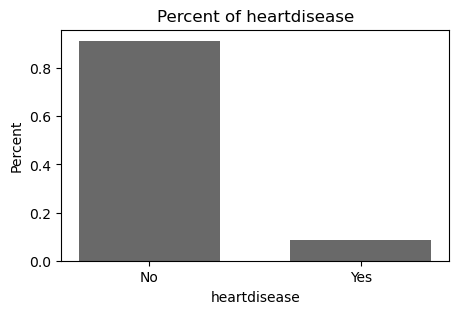

In [13]:
plot_bar_chart(data, 'heartdisease', False)

#### bmi

In [14]:
descriptive_statistics(data, 'bmi', False)

Mean: 28.33
Median: 27.34
STD: 6.36
Var: 40.4


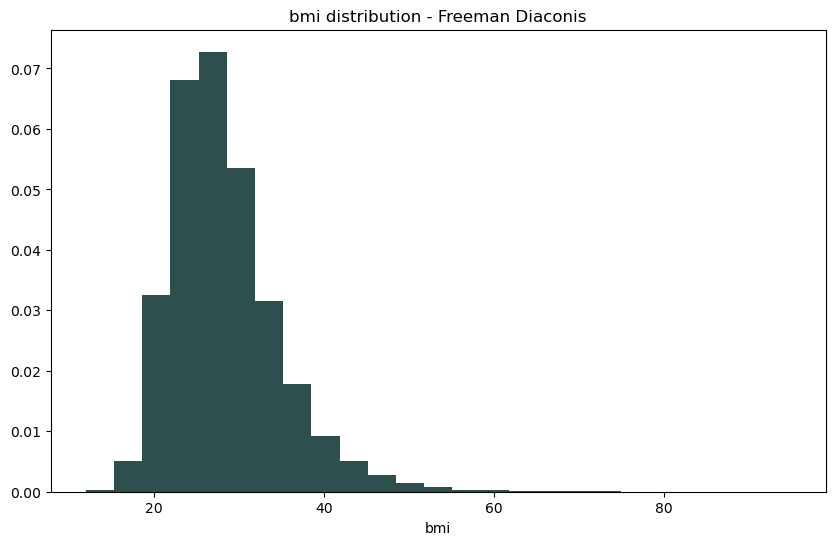

In [15]:
draw_histogram(data, 'bmi', num_bins=25)

#### smoking

In [16]:
descriptive_statistics(data, 'smoking', True)

NULLs: 0
No     0.587523
Yes    0.412477
Name: smoking, dtype: float64


#### alcohol drinking

In [17]:
descriptive_statistics(data, 'alcoholdrinking', True)

NULLs: 0
No     0.931903
Yes    0.068097
Name: alcoholdrinking, dtype: float64


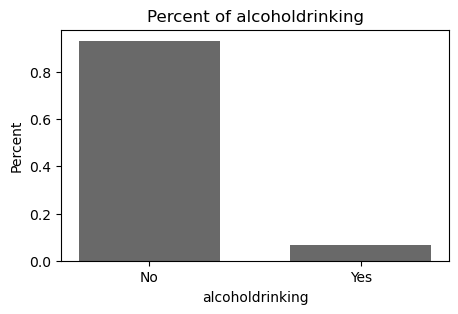

In [18]:
plot_bar_chart(data, 'alcoholdrinking', False)

#### stroke

In [19]:
descriptive_statistics(data, 'stroke', True)

NULLs: 0
No     0.96226
Yes    0.03774
Name: stroke, dtype: float64


#### physical health

In [20]:
descriptive_statistics(data, 'physicalhealth', False)

Mean: 3.37
Median: 0.0
STD: 7.95
Var: 63.22


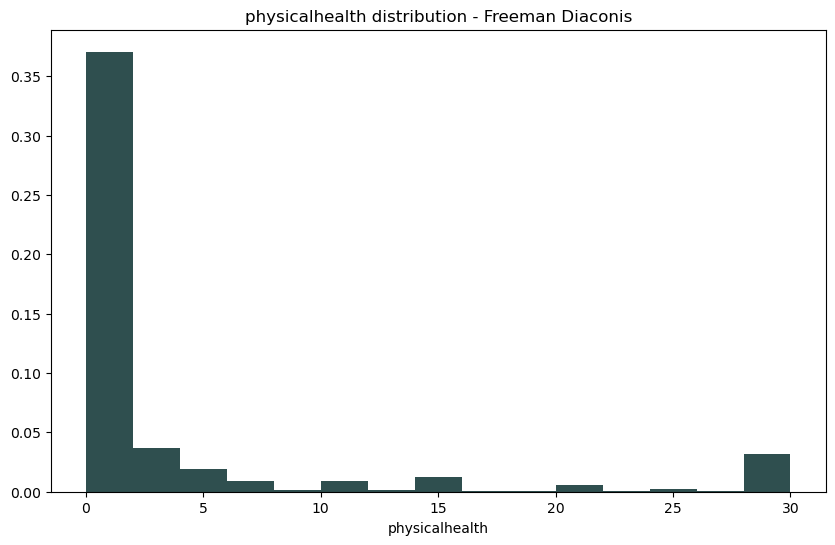

In [21]:
draw_histogram(data, 'physicalhealth', num_bins=15)

#### mental health

In [22]:
descriptive_statistics(data, 'mentalhealth')

Mean: 3.9
Median: 0.0
STD: 7.96
Var: 63.29


#### diff walking

#### sex

#### age category

#### race

#### diabetic

#### physical activity

#### gen health

#### sleep time

#### asthma

#### kidneydisease

#### skin cancer

In [23]:
data.columns

Index(['heartdisease', 'bmi', 'smoking', 'alcoholdrinking', 'stroke',
       'physicalhealth', 'mentalhealth', 'diffwalking', 'sex', 'agecategory',
       'race', 'diabetic', 'physicalactivity', 'genhealth', 'sleeptime',
       'asthma', 'kidneydisease', 'skincancer'],
      dtype='object')

### Preprocessing

#### Encoding values

In [24]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

In [26]:
data['heartdisease'].replace({'Yes':1,'No':0},inplace=True)
# data['smoking'].replace({'Yes':1,'No':0},inplace=True)
# data['alcoholdrinking'].replace({'Yes':1,'No':0},inplace=True)
# data['stroke'].replace({'Yes':1,'No':0},inplace=True)
# data['diffwalking'].replace({'Yes':1,'No':0},inplace=True)
# data['physicalactivity'].replace({'Yes':1,'No':0},inplace=True)
# data['asthma'].replace({'Yes':1,'No':0},inplace=True)
# data['kidneydisease'].replace({'Yes':1,'No':0},inplace=True)
# data['skincancer'].replace({'Yes':1,'No':0},inplace=True)

#### Train-Test Split

In [28]:
target = data.loc[:, data.columns == 'heartdisease']
features = data.loc[:, data.columns != 'heartdisease']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, train_size=0.8, random_state=7, stratify=data['heartdisease'])

In [30]:
print('Train size: {}, Test size: {}'.format(len(X_train.index), len(X_test.index)))

Train size: 255836, Test size: 63959


#### MinMax Scaler

In [31]:
minmax = MinMaxScaler()
minmax.fit(X_train[['bmi', 'physicalhealth', 'mentalhealth', 'sleeptime']], )
scaled = minmax.transform(X_train[['bmi', 'physicalhealth', 'mentalhealth', 'sleeptime']])

In [32]:
scaled_df = pd.DataFrame(scaled, columns=['bmi', 'physicalhealth', 'mentalhealth', 'sleeptime'])
scaled_df.head()

,bmi,physicalhealth,mentalhealth,sleeptime
0,0.163105,0.0,0.0,0.260870
1,0.213208,1.0,1.0,0.217391
2,0.138356,0.0,0.0,0.217391
3,0.212846,0.0,0.1,0.217391
4,0.139322,0.0,0.0,0.086957


#### Ordinal Encoding

In [33]:
ordinal_enc = OrdinalEncoder(dtype=int)
ordinal_enc.fit(X_train[['smoking', 'alcoholdrinking', 'stroke', 'diffwalking', 'physicalactivity', 'asthma', 'kidneydisease', 'skincancer']])

OrdinalEncoder(dtype=<class 'int'>)

In [34]:
encoded = ordinal_enc.transform(X_train[['smoking', 'alcoholdrinking', 'stroke', 'diffwalking', 'physicalactivity', 'asthma', 'kidneydisease', 'skincancer']])

In [35]:
ordinal_enc_df = pd.DataFrame(encoded, columns=ordinal_enc.feature_names_in_)

In [36]:
ordinal_enc_df.head()

,smoking,alcoholdrinking,stroke,diffwalking,physicalactivity,asthma,kidneydisease,skincancer
0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,1,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0


#### OneHot Encoding

In [37]:
one_hot = OneHotEncoder(categories='auto', drop=None, handle_unknown='ignore', dtype=int)
one_hot.fit(X_train[['sex', 'agecategory', 'race', 'diabetic', 'genhealth']])
one_hot_encoded = one_hot.transform(X_train[['sex', 'agecategory', 'race', 'diabetic', 'genhealth']]).toarray()

In [38]:
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot.get_feature_names_out())
one_hot_encoded_df.head()

,sex_Female,sex_Male,agecategory_18-24,agecategory_25-29,agecategory_30-34,agecategory_35-39,agecategory_40-44,agecategory_45-49,agecategory_50-54,agecategory_55-59,...,race_White,diabetic_No,"diabetic_No, borderline diabetes",diabetic_Yes,diabetic_Yes (during pregnancy),genhealth_Excellent,genhealth_Fair,genhealth_Good,genhealth_Poor,genhealth_Very good
0,1,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0


#### Concatenate

In [39]:
# categorial_features = X_train[['smoking', 'alcoholdrinking', 'stroke', 'diffwalking', 'physicalactivity', 'asthma', 'kidneydisease','skincancer']]
X_train_encoded = pd.concat([ordinal_enc_df, scaled_df, one_hot_encoded_df], axis=1)

In [40]:
X_train_encoded.head()

,smoking,alcoholdrinking,stroke,diffwalking,physicalactivity,asthma,kidneydisease,skincancer,bmi,physicalhealth,...,race_White,diabetic_No,"diabetic_No, borderline diabetes",diabetic_Yes,diabetic_Yes (during pregnancy),genhealth_Excellent,genhealth_Fair,genhealth_Good,genhealth_Poor,genhealth_Very good
0,0,0,0,0,1,0,0,0,0.163105,0.0,...,1,1,0,0,0,1,0,0,0,0
1,0,0,0,1,0,1,0,0,0.213208,1.0,...,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0.138356,0.0,...,1,1,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0.212846,0.0,...,1,1,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0.139322,0.0,...,1,1,0,0,0,1,0,0,0,0


In [88]:
corr = round(X_train_encoded.corr(), 2)

<AxesSubplot:>

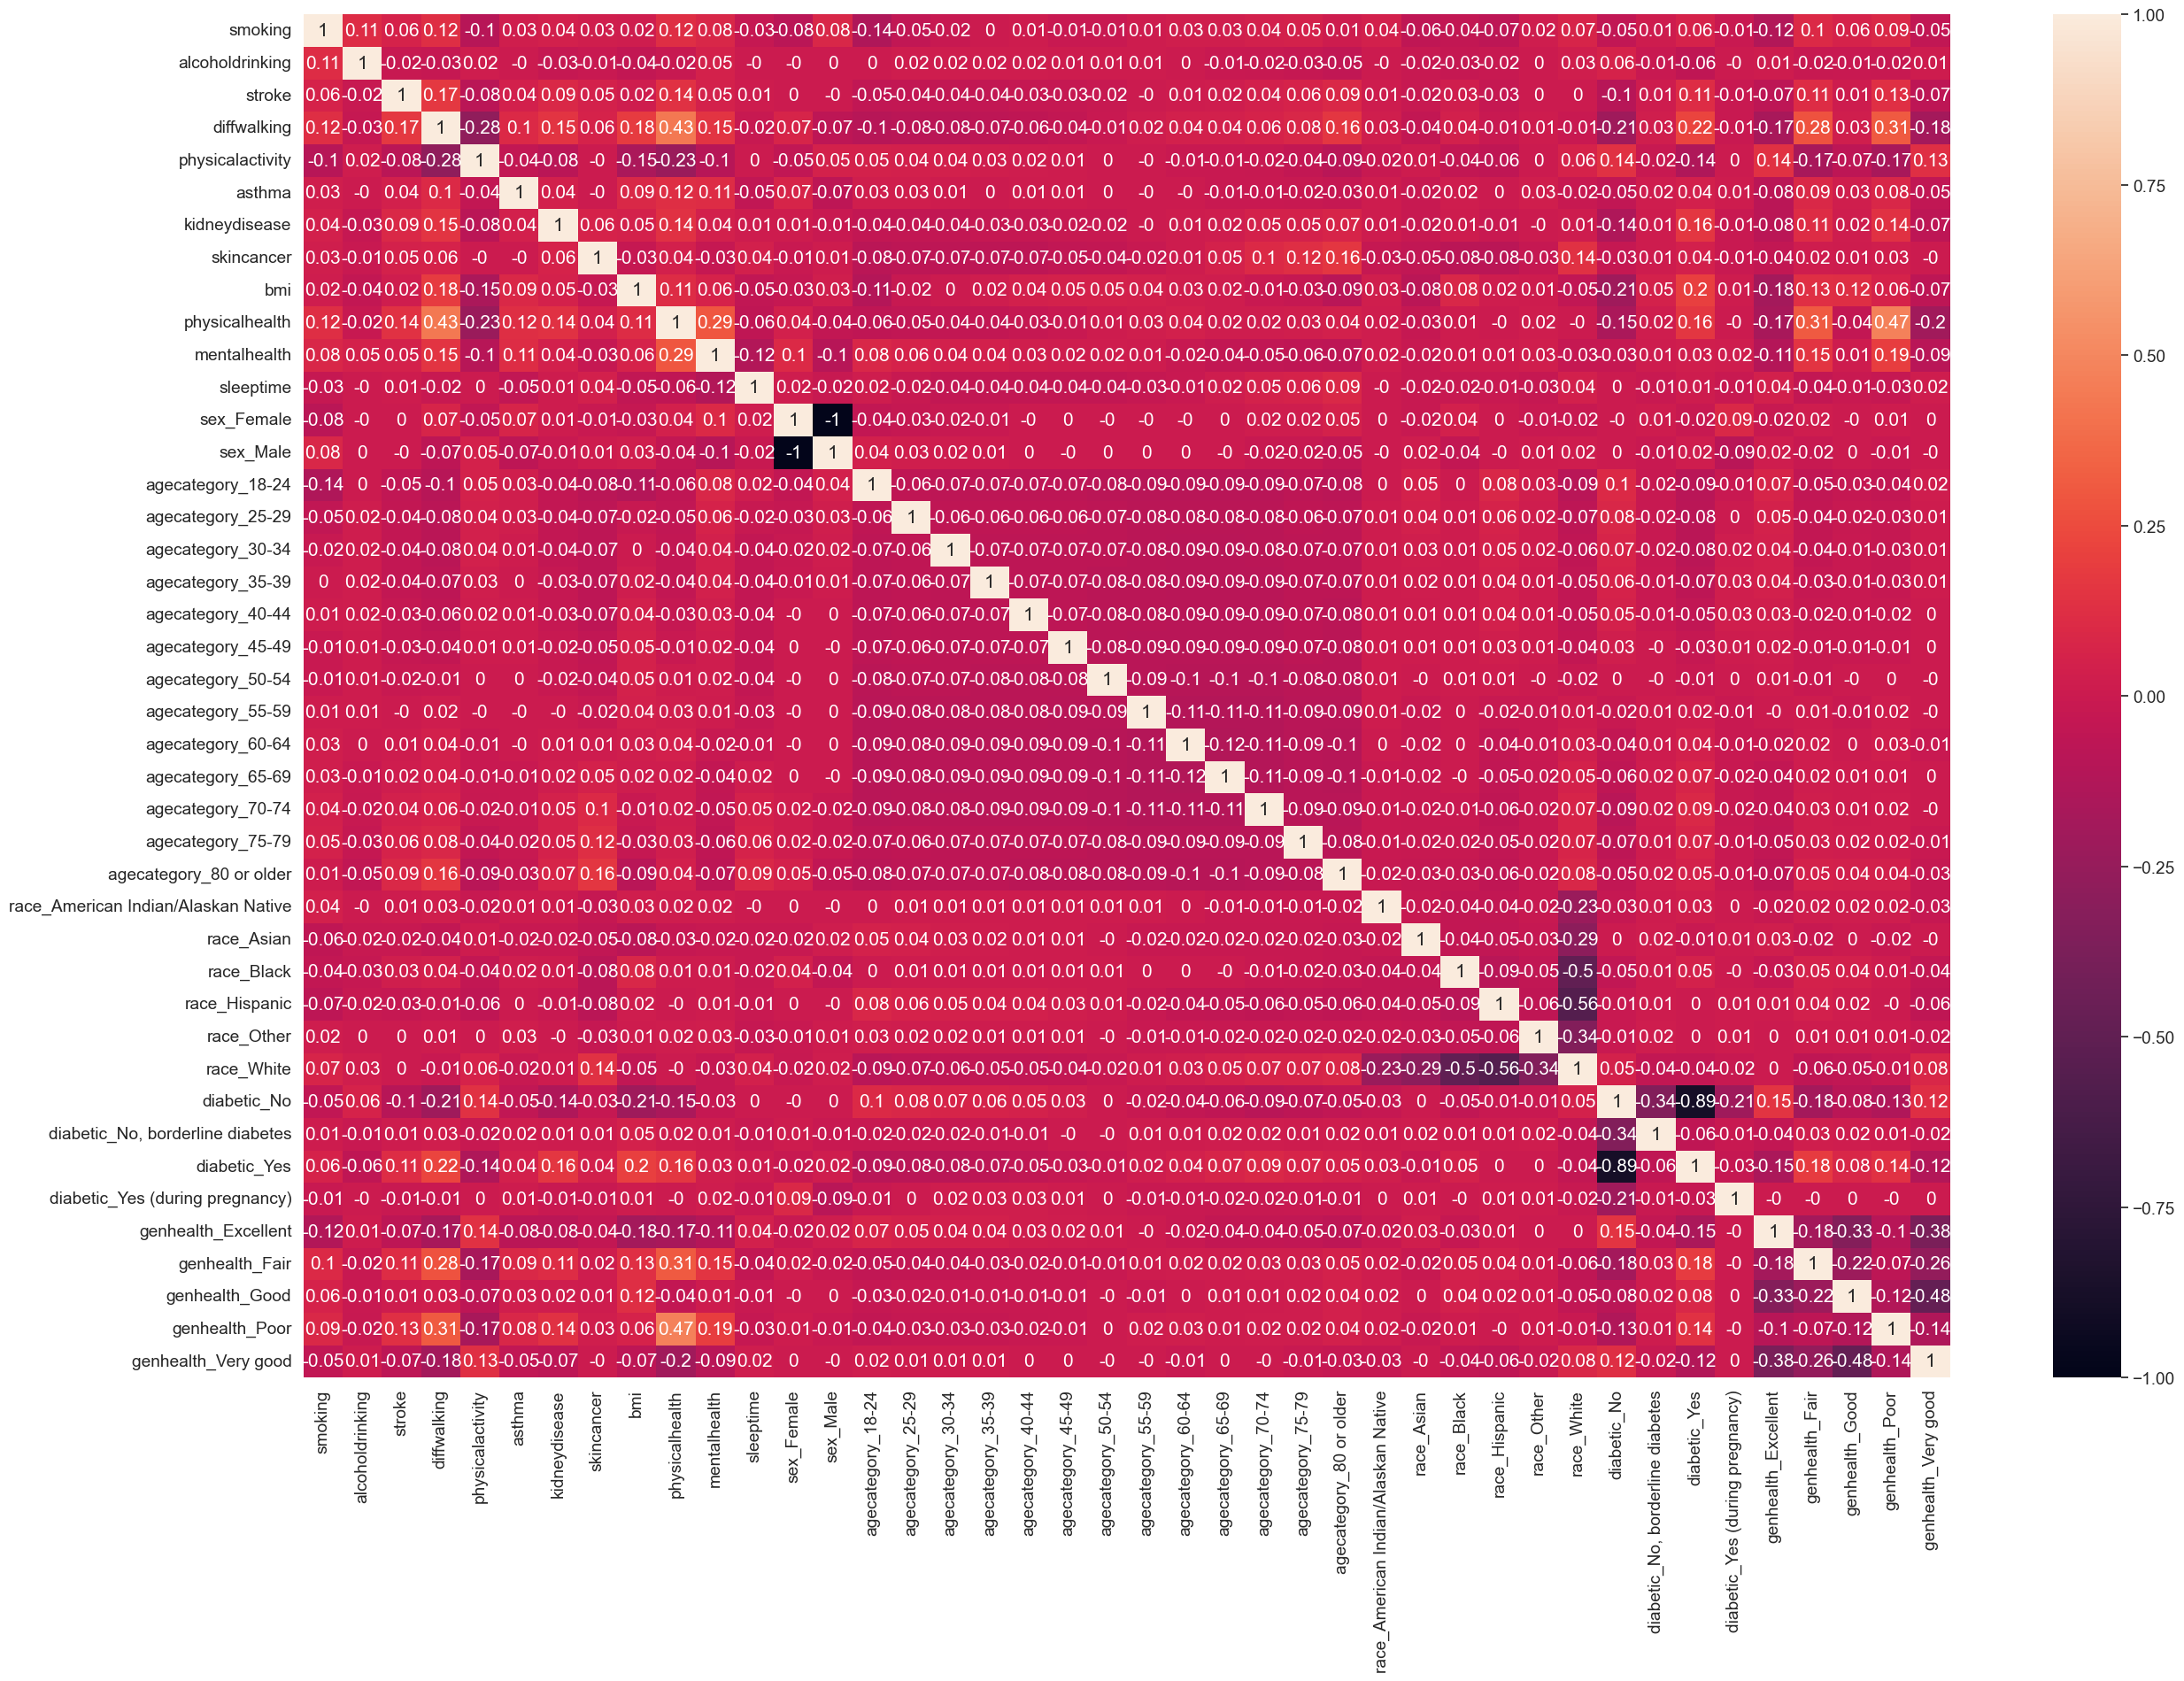

In [89]:
fig = plt.figure(figsize=(30,20))
sns.heatmap(corr, annot=True)

### Modeling

In [ ]:
# bmi_min = np.min(X_train['bmi'])
# bmi_max = np.max(X_train['bmi'])
# phyhealth_min = np.min(X_train['physicalhealth'])
# phyhealth_max = np.max(X_train['physicalhealth'])
# menhealth_min = np.min(X_train['mentalhealth'])
# menhealth_max = np.max(X_train['mentalhealth'])

In [41]:
from sklearn.linear_model import LogisticRegression

In [58]:
clf = LogisticRegression(max_iter=500, class_weight='balanced')
clf.fit(X_train_encoded, y_train['heartdisease'])

LogisticRegression(class_weight='balanced', max_iter=500)

In [ ]:
pred = clf.predict(X_train_encoded)

#### Feature Importance

In [92]:
importance = clf.coef_

In [107]:
for i,v in zip(clf.feature_names_in_, importance[0]):
    print('Feature: {}, Score: {}'.format(i,v))

Feature: smoking, Score: 0.3865858428735692
Feature: alcoholdrinking, Score: -0.20588037456774155
Feature: stroke, Score: 1.2193392057456134
Feature: diffwalking, Score: 0.23707452042706215
Feature: physicalactivity, Score: 0.0033710554592173625
Feature: asthma, Score: 0.3163626817547946
Feature: kidneydisease, Score: 0.594764914047723
Feature: skincancer, Score: 0.14439082176956458
Feature: bmi, Score: 0.7843459452971401
Feature: physicalhealth, Score: 0.16669230961281617
Feature: mentalhealth, Score: 0.21009496762999494
Feature: sleeptime, Score: -0.6561560375895197
Feature: sex_Female, Score: -0.5909038925831167
Feature: sex_Male, Score: 0.15237241655210626
Feature: agecategory_18-24, Score: -1.6701421356962909
Feature: agecategory_25-29, Score: -1.4675204765491796
Feature: agecategory_30-34, Score: -1.1950429737766066
Feature: agecategory_35-39, Score: -1.0263430073187467
Feature: agecategory_40-44, Score: -0.7082767876235484
Feature: agecategory_45-49, Score: -0.40735747768535047


### Testing

In [56]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score

In [60]:
print('Accuracy: ', accuracy_score(y_train['heartdisease'], pred))
print('Recall: ', recall_score(y_train['heartdisease'], pred))
print('Precision: ', precision_score(y_train['heartdisease'], pred))
print('F1-score: ', f1_score(y_train['heartdisease'], pred))

Accuracy:  0.7495856720711706
Recall:  0.7809388985295461
Precision:  0.22392593853526954
F1-score:  0.3480517365951947


In [61]:
confusion_matrix(y_train['heartdisease'], pred)

array([[174670,  59268],
       [  4797,  17101]])

In [62]:
test_scaled = minmax.transform(X_test[['bmi', 'physicalhealth', 'mentalhealth', 'sleeptime']])
test_encoded = ordinal_enc.transform(X_test[['smoking', 'alcoholdrinking', 'stroke', 'diffwalking', 'physicalactivity', 'asthma', 'kidneydisease', 'skincancer']])
test_one_hot_encoded = one_hot.transform(X_test[['sex', 'agecategory', 'race', 'diabetic', 'genhealth']]).toarray()

In [63]:
test_scaled_df = pd.DataFrame(test_scaled, columns=['bmi', 'physicalhealth', 'mentalhealth', 'sleeptime'])
test_ordinal_enc_df = pd.DataFrame(test_encoded, columns=ordinal_enc.feature_names_in_)
test_one_hot_encoded_df = pd.DataFrame(test_one_hot_encoded, columns=one_hot.get_feature_names_out())

In [64]:
X_test_encoded = pd.concat([test_ordinal_enc_df, test_scaled_df, test_one_hot_encoded_df], axis=1)

In [66]:
y_pred = clf.predict(X_test_encoded)

In [67]:
print('Accuracy: ', accuracy_score(y_test['heartdisease'], y_pred))
print('Recall: ', recall_score(y_test['heartdisease'], y_pred))
print('Precision: ', precision_score(y_test['heartdisease'], y_pred))
print('F1-score: ', f1_score(y_test['heartdisease'], y_pred))

Accuracy:  0.7545927860035335
Recall:  0.782283105022831
Precision:  0.22797679246287325
F1-score:  0.35306240211029594
